# Example of load and generation distribution in Germany with `PyPSA`(pipes-ah)
This is an example from `PyPSA` of power flow simulations using the [SciGRID](http://scigrid.de/) model of Germany.

This example does not contain any power flow solving, it is just an illustration of a model of the German power grid with data from 2013.

import `pypsa` and `matplotlib` as well as `cartopy` for plotting

In [1]:
import pypsa, os

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import warnings
warnings.filterwarnings('ignore')

Load the premade *SciGRID* network

In [2]:
network = pypsa.examples.scigrid_de(from_master=True)

INFO:pypsa.io:Imported network scigrid-de.nc has buses, generators, lines, loads, storage_units, transformers


Show the distribution of the load over the nodes

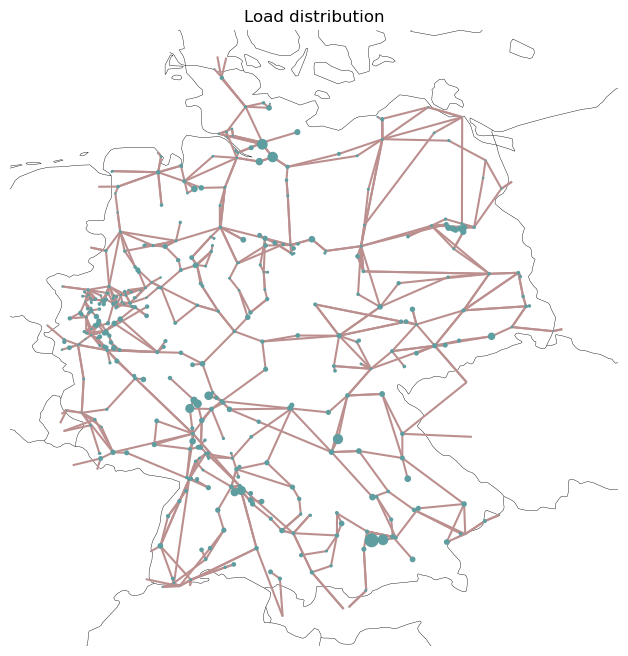

In [3]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.EqualEarth()}, figsize=(8, 8))

load_distribution = (network.loads_t.p_set.loc[network.snapshots[0]].groupby(network.loads.bus).sum())

network.plot(bus_sizes=1e-5 * load_distribution, ax=ax, title="Load distribution");

In [4]:
network.generators.groupby("carrier")["p_nom"].sum()

carrier
Brown Coal       20879.500000
Gas              23913.130000
Geothermal          31.700000
Hard Coal        25312.600000
Multiple           152.700000
Nuclear          12068.000000
Oil               2710.200000
Other             3027.800000
Run of River      3999.100000
Solar            37041.524779
Storage Hydro     1445.000000
Waste             1645.900000
Wind Offshore     2973.500000
Wind Onshore     37339.895329
Name: p_nom, dtype: float64

In [5]:
network.storage_units.groupby("carrier")["p_nom"].sum()

carrier
Pumped Hydro    9179.5
Name: p_nom, dtype: float64

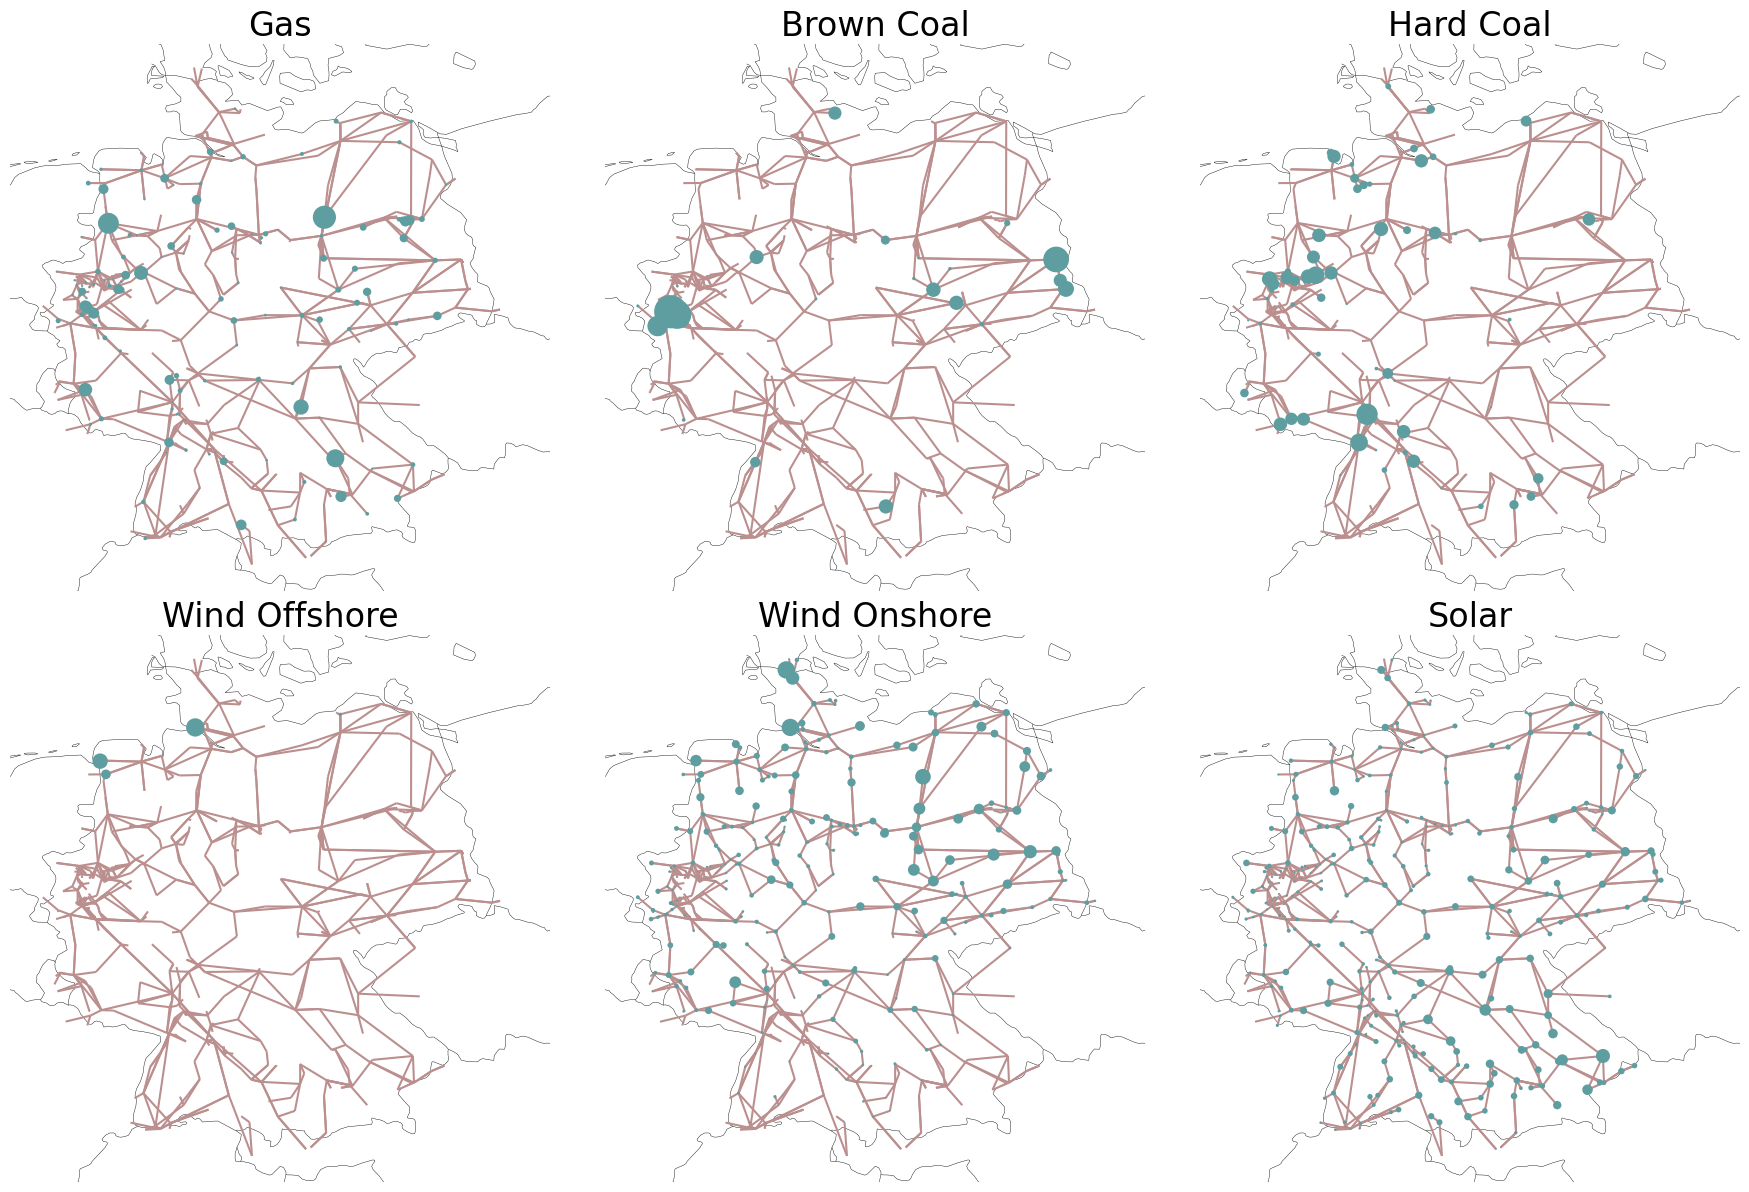

In [6]:
techs = ["Gas", "Brown Coal", "Hard Coal", "Wind Offshore", "Wind Onshore", "Solar"]

n_graphs = len(techs)
n_cols = 3
if n_graphs % n_cols == 0:
    n_rows = n_graphs // n_cols
else:
    n_rows = n_graphs // n_cols + 1


fig, axes = plt.subplots(
    nrows=n_rows, ncols=n_cols, subplot_kw={"projection": ccrs.EqualEarth()}
)
size = 6
fig.set_size_inches(size * n_cols, size * n_rows)

for i, tech in enumerate(techs):
    i_row = i // n_cols
    i_col = i % n_cols

    ax = axes[i_row, i_col]
    gens = network.generators[network.generators.carrier == tech]
    gen_distribution = (
        gens.groupby("bus").sum()["p_nom"].reindex(network.buses.index, fill_value=0.0)
    )
    network.plot(ax=ax, bus_sizes=2e-5 * gen_distribution)
    ax.set_title(tech, fontsize=24)
fig.tight_layout()

### Installation and others

To use `PyPSA` it is advised to have `anaconda`/`miniconda` installed. Then either:
```
pip install pypsa
```
or
```
conda install -c conda-forge pypsa
```

This script was adapted from [`PyPSA`'s SciGRID LOPF and PF example](https://github.com/PyPSA/PyPSA/blob/v0.25.2/examples/notebooks/scigrid-lopf-then-pf.ipynb) for the *FYS377 Digital Power Systems*, by *Heidi S. Nygård*, NMBU. Adapted by Leonardo Rydin Gorjão. 2023.